# Artificial Neural Network

In [ ]:
# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
#Defining the inout and the output feature
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [12]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [13]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [14]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# Feature Scaling/Normalising the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - let's make the ANN!

In [20]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [31]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6,activation='relu',input_dim = 11))

In [32]:
# Adding the second hidden layer
classifier.add(Dense(6,activation='relu'))
# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [34]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 [==============================] - 16s 3ms/step - loss: 0.6794 - accuracy: 0.6047 - val_loss: 0.5696 - val_accuracy: 0.7914
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5604 - accuracy: 0.7911 - val_loss: 0.5123 - val_accuracy: 0.7962
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4978 - accuracy: 0.8056 - val_loss: 0.4919 - val_accuracy: 0.7962
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4888 - accuracy: 0.7982 - val_loss: 0.4771 - val_accuracy: 0.7962
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.7904 - val_loss: 0.4637 - val_accuracy: 0.7949
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.8039 - val_loss: 0.4528 - val_accuracy: 0.8044
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.8124 - val_loss: 0.4445 - val_accuracy: 0.809

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


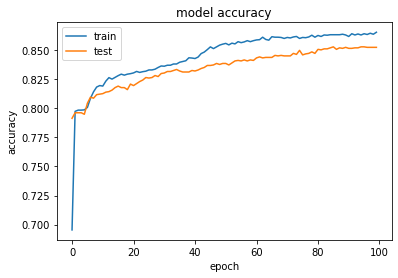

In [37]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

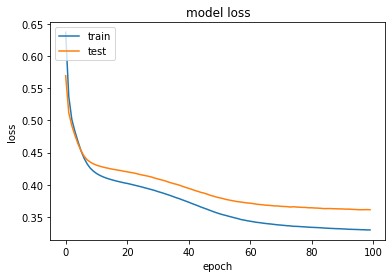

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

In [46]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2278,  101],
       [ 331,  290]])

In [47]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.856